## Problem Formulation

- In this example, we want to investigate "what factors/variables affect the performance of sales"
- Our aim is to go back to the buiseness and make suggestions about sales increase
- Make sales predictions given specific variables values
- Hence our Dependent variable (y) is Sales

### Importing / Installing packages

In [67]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})

# import sys
# !conda list Check the packages installed

### Loading the Raw Data

In [66]:
import pandas as pd
df=pd.read_csv('C:/Users/sreen/Desktop/OSU Course/Data Mining/python/project/Stores - Stores.csv')
df.head(10)

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
5,6,1442,1733,760,45260
6,7,1542,1858,1030,72240
7,8,1261,1507,1020,37720
8,9,1090,1321,680,46310
9,10,1030,1235,1130,44150


### Exploratory Data Analysis

In [2]:
df.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [65]:
# Investigate all the elements whithin each Feature 

for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Store ID :896
The number of values for feature Store_Area :583
The number of values for feature Items_Available :616
The number of values for feature Daily_Customer_Count :130
The number of values for feature Store_Sales :816


In [3]:
df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


In [4]:
df['Store_Area'].value_counts()

1439    5
1513    5
1458    5
1440    5
1539    5
       ..
1509    1
1339    1
1590    1
2169    1
1387    1
Name: Store_Area, Length: 583, dtype: int64

In [40]:
df['Store_Area'].unique()

array([1659, 1461, 1340, 1451, 1770, 1442, 1542, 1261, 1090, 1030, 1187,
       1751, 1746, 1615, 1469, 1644, 1578, 1703, 1438, 1940, 1421, 1458,
       1719, 1449, 1234, 1732, 1475, 1390, 1642, 1715, 1439, 1250, 1331,
       1784, 1375, 1871, 1174, 1839, 1270, 1435,  965, 1665, 1780, 1009,
       1227, 1769, 1660, 1472, 1408, 1514, 1565, 1074, 1864, 1570, 1417,
       1734, 1470, 1761, 1756, 1704, 2011, 1310, 1544, 1707, 1881, 1416,
       1631, 1318, 1692, 1152,  891, 1468, 1539, 1635, 1267, 1720, 1462,
       1431, 1441, 1572, 1287, 1931, 1252, 1238, 1479, 1590, 2169, 1838,
       1385, 1921, 1975, 1853, 1816, 1785, 1579, 1096, 1919, 1262, 1374,
       1309, 1207, 1929, 1573, 1415, 1162, 1485, 1897, 1607, 1909, 1274,
       1157, 1712, 1500, 1682, 1525, 1947, 1164, 1787, 1718, 1365, 1368,
       1342, 1076, 1396, 1713, 1370, 1667, 1638, 1581, 1795, 1179, 1978,
       1688, 1214, 1504, 1498, 1229, 1936, 1369, 1662, 1548, 1649, 1393,
       1450, 1613,  775, 1275, 1740, 1372, 1414, 20

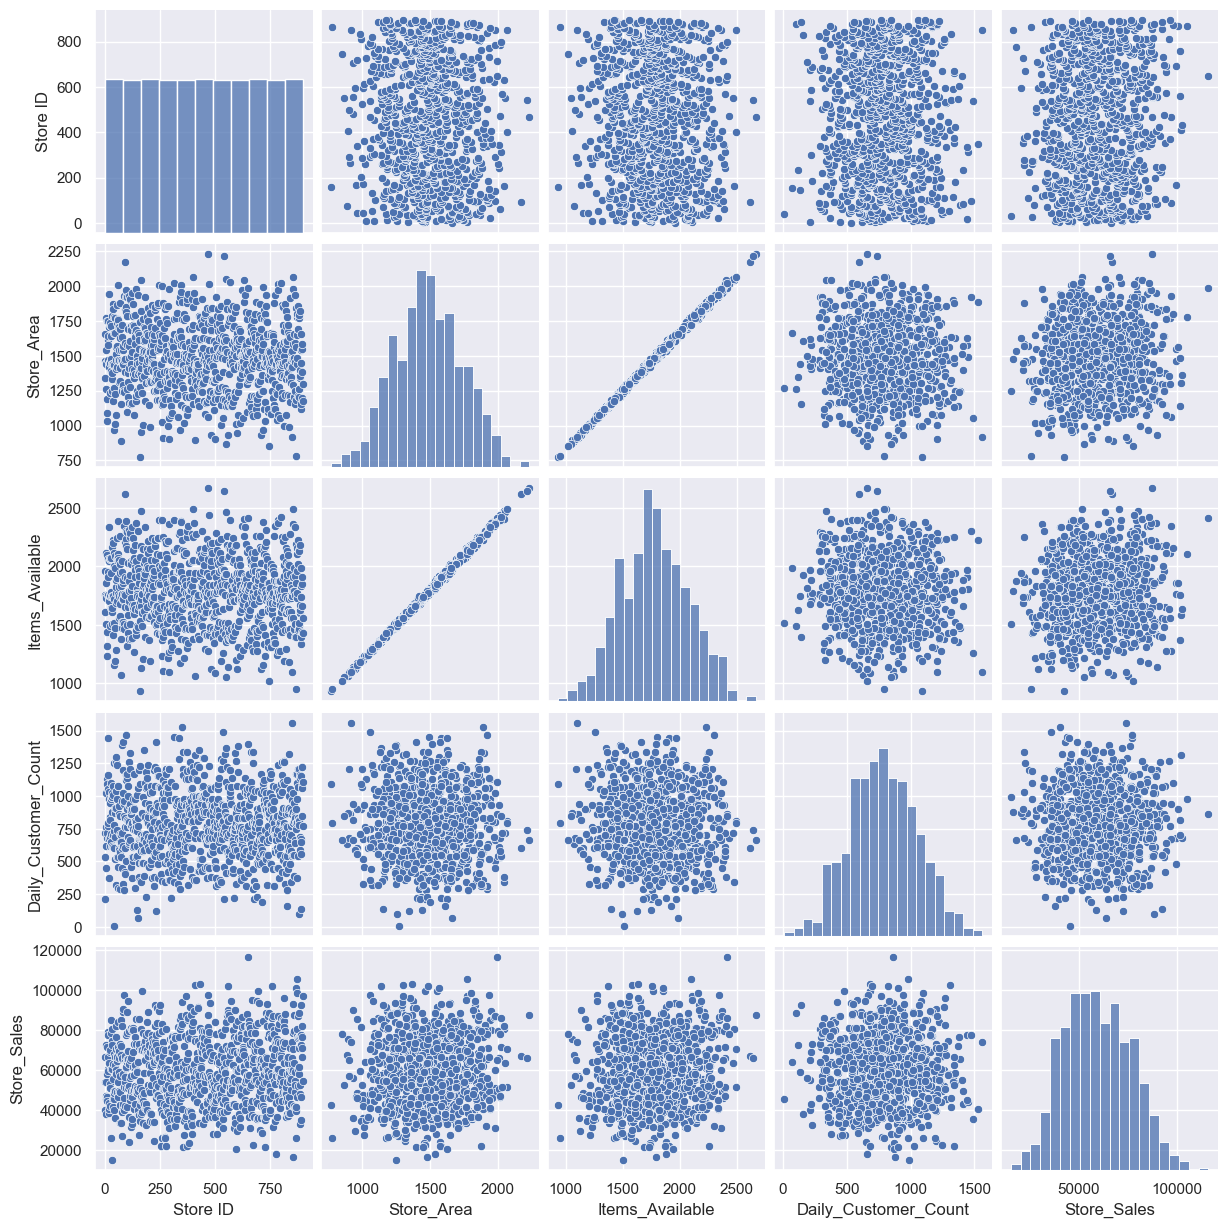

In [68]:
# Visualize the data using seaborn Pairplots

g = sns.pairplot(df)

In [12]:
df['Store_Area'].nunique()

583

In [13]:
df.columns

Index(['Store ID', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [14]:
# grouping the data using store area

area_grp = df.groupby(['Store_Area'])

In [15]:
area_grp.size()

Store_Area
775     1
780     1
854     1
869     1
891     1
       ..
2063    1
2067    1
2169    1
2214    1
2229    1
Length: 583, dtype: int64

In [17]:
area_grp.sum()

,Store ID,Items_Available,Daily_Customer_Count,Store_Sales
Store_Area,,,,
775,159,932,1090,42530
780,866,951,790,25600
854,745,1018,660,77740
869,550,1050,850,52540
891,73,1073,630,67370
...,...,...,...,...
2063,399,2493,810,51480
2067,850,2492,790,70230
2169,92,2617,600,67080


In [18]:
area_grp_df=area_grp['Items_Available', 'Daily_Customer_Count',
       'Store_Sales'].sum()

C:\Users\sreen\AppData\Local\Temp\ipykernel_47360\3707404625.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  area_grp_df=area_grp['Items_Available', 'Daily_Customer_Count',


In [19]:
area_grp_df[:5]

,Items_Available,Daily_Customer_Count,Store_Sales
Store_Area,,,
775,932,1090,42530
780,951,790,25600
854,1018,660,77740
869,1050,850,52540
891,1073,630,67370


In [41]:
area_grp_df['Store_Area']=sorted(df['Store_Area'].unique())

In [42]:
area_grp_df[:5]

,Items_Available,Daily_Customer_Count,Store_Sales,Store_Area
Store_Area,,,,
775,932,1090,42530,775
780,951,790,25600,780
854,1018,660,77740,854
869,1050,850,52540,869
891,1073,630,67370,891


In [44]:
area_grp_df.isnull().sum()

Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
Store_Area              0
dtype: int64

In [45]:
area_grp_df.corr()

,Items_Available,Daily_Customer_Count,Store_Sales,Store_Area
Items_Available,1.000000,0.829102,0.880339,0.190058
Daily_Customer_Count,0.829102,1.000000,0.806795,-0.109489
Store_Sales,0.880339,0.806795,1.000000,-0.046141
Store_Area,0.190058,-0.109489,-0.046141,1.000000


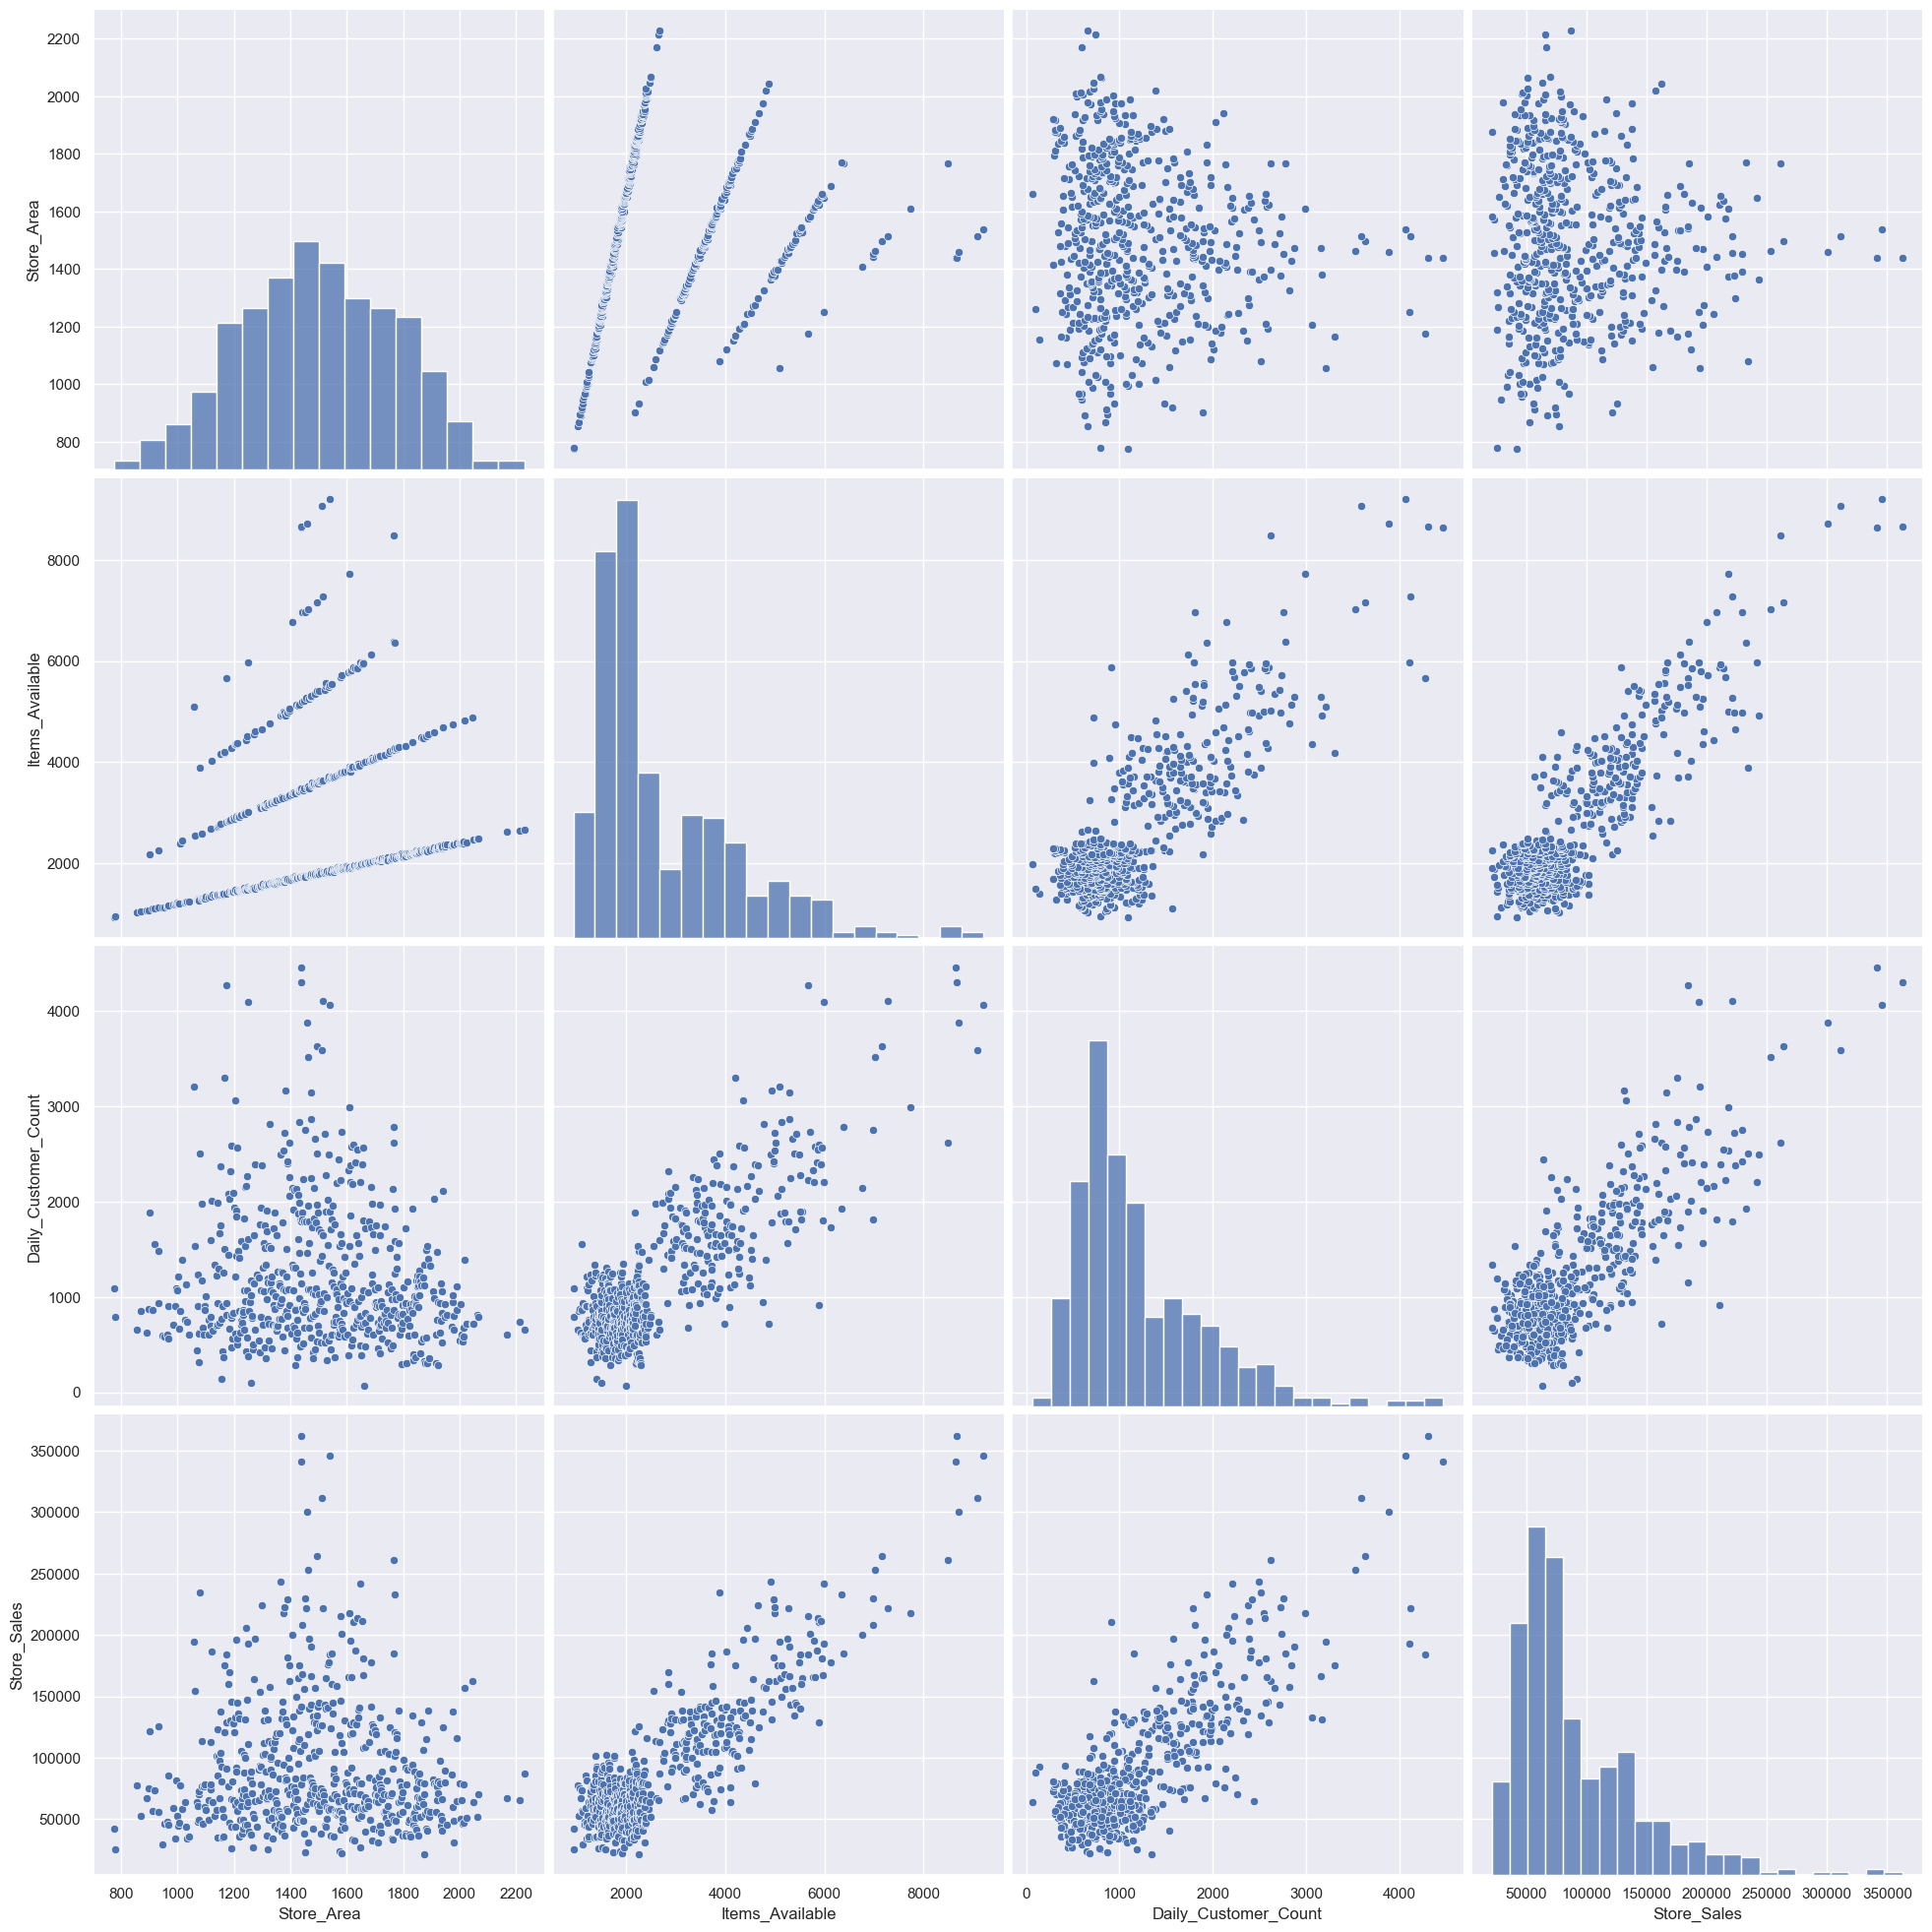

In [46]:
# Visualising a Subset of our data - important features

g = sns.pairplot(area_grp_df[['Store_Area','Items_Available', 'Daily_Customer_Count',
       'Store_Sales']], height = 5)

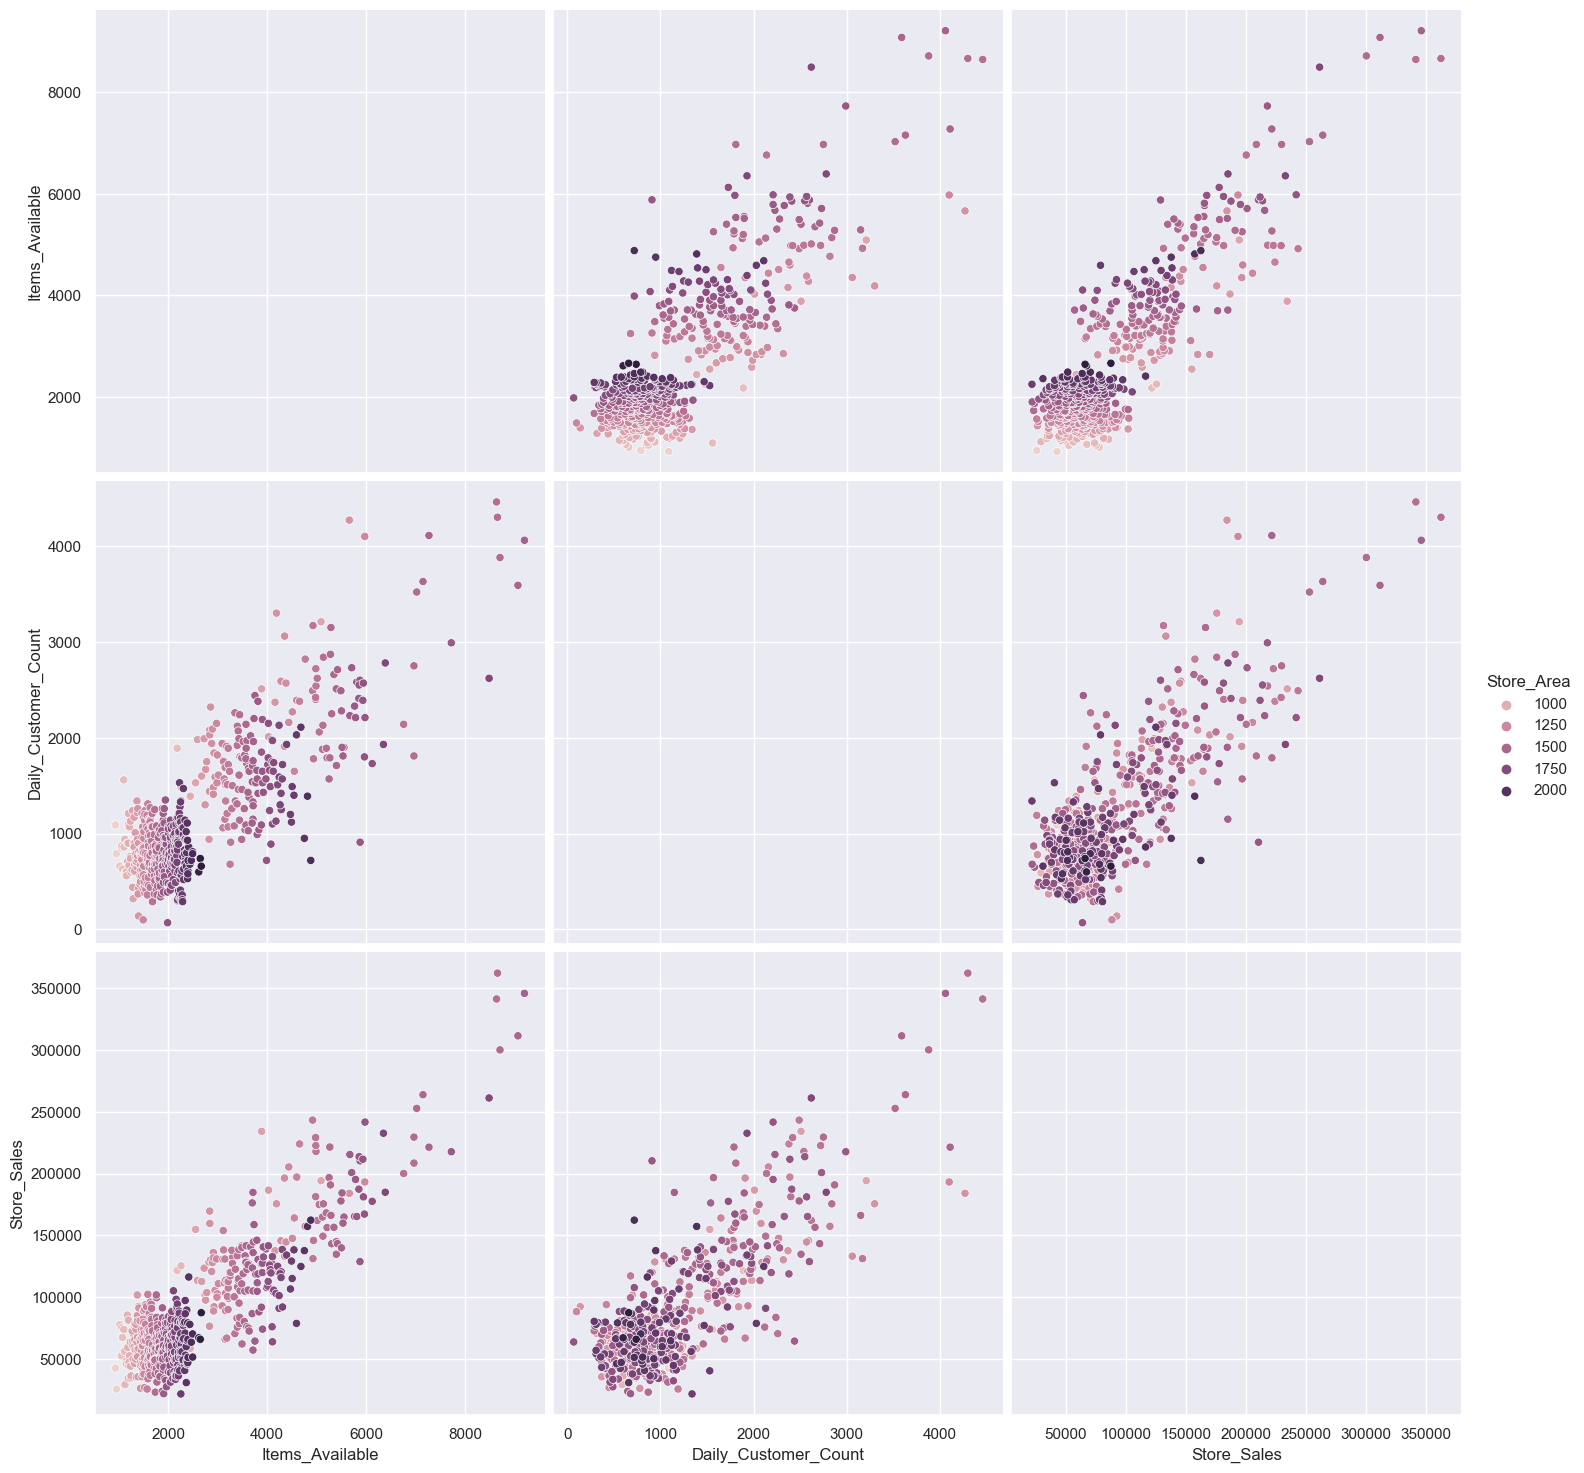

In [47]:
g = sns.pairplot(area_grp_df[['Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales']], hue = 'Store_Area', height = 5)

## Feature Selection

In this example, we do not have many variables so we should use all of the data but in some cases, you have thousands of
variables and you will need to filter them in order to save computational time

2 ways to help us select the important features are:

- Correlation
- Feature Importance

### 1. Correlation

In [48]:
# Running Correlation

hm = area_grp_df[['Store_Area','Items_Available','Daily_Customer_Count','Store_Sales']].corr()

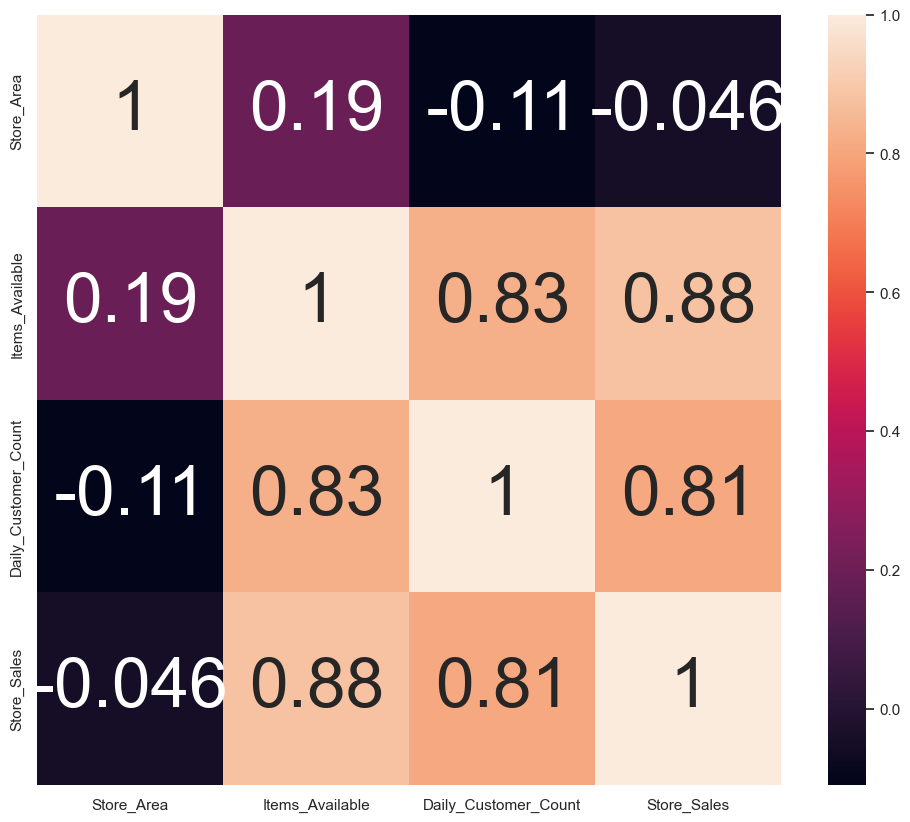

In [49]:
# Visualizing Correlation with a Heatmap

g = sns.heatmap(hm, annot = True, annot_kws={'size':50})

In [55]:
# Split the data into X & y

X = area_grp_df.drop(['Store_Sales','Store_Area'],axis=1).values
X2 = area_grp_df.drop(['Store_Sales','Store_Area'], axis = 1)
y = area_grp_df['Store_Sales']

print(X.shape)
print(y.shape)

X

(583, 2)
(583,)


array([[ 932, 1090],
       [ 951,  790],
       [1018,  660],
       ...,
       [2617,  600],
       [2647,  740],
       [2667,  660]], dtype=int64)

### Steps of Running Feature Importance

- Split the data into X & y
- Run a Tree-based estimators (i.e. decision trees & random forests)
- Run Feature Importance

In [56]:
# Run a Tree-based estimators (i.e. decision trees & random forests)
dt = DecisionTreeClassifier(random_state=0, criterion  = 'entropy', max_depth = 10)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

In [57]:
# Running Feature Importance

for i, column in enumerate(area_grp_df.drop(['Store_Sales','Store_Area'],axis=1)):
    print('The feature importance for {} is: {:.3f}'.format(column, dt.feature_importances_[i]))

The feature importance for Items_Available is: 0.662
The feature importance for Daily_Customer_Count is: 0.338


### Splitting the Raw Data - Hold-out validation

In [58]:
# Hold-out validation

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, test_size = 0.15, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(495, 2)
(88, 2)
(495,)
(88,)


## Running Linear Regression

In [59]:
# Training the Regression

lm = LinearRegression(fit_intercept = True)
lm.fit(X_train, y_train)

y_pred = lm.predict(X_train)

## Evaluating the Model

In [60]:
# Model Accuracy on training dataset

print('The Accuracy  on the training dataset is: ', lm.score(X_train, y_train) )
print('The Accuracy n2  on the training dataset is: ',r2_score(y_train,y_pred) )   

print("")
# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm.score(X_test, y_test) )

print("")
# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm.predict(X_test))))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm.predict(X_test)))


print("")
# Coefficients
print('Coefficients: ', lm.coef_ )

print("")
# The Intercept
print('Intercept: ', lm.intercept_)


The Accuracy  on the training dataset is:  0.7760919952777161
The Accuracy n2  on the training dataset is:  0.7760919952777161

The Accuracy  on the testing dataset is:  0.8575993196410544

The RMSE  on the training dataset is:  23793.298435854813
The RMSE  on the testing dataset is:  23607.692421967462

The MAE  on the training dataset is:  18488.946508372137
The MAE  on the testing dataset is:  17694.152358819894

Coefficients:  [24.432718 16.647700]

Intercept:  4069.2415046423266


C:\Users\sreen\AppData\Local\Temp\ipykernel_47360\1073521889.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)


Text(0.5, 1.0, 'Actuals Vs Predicted Values')

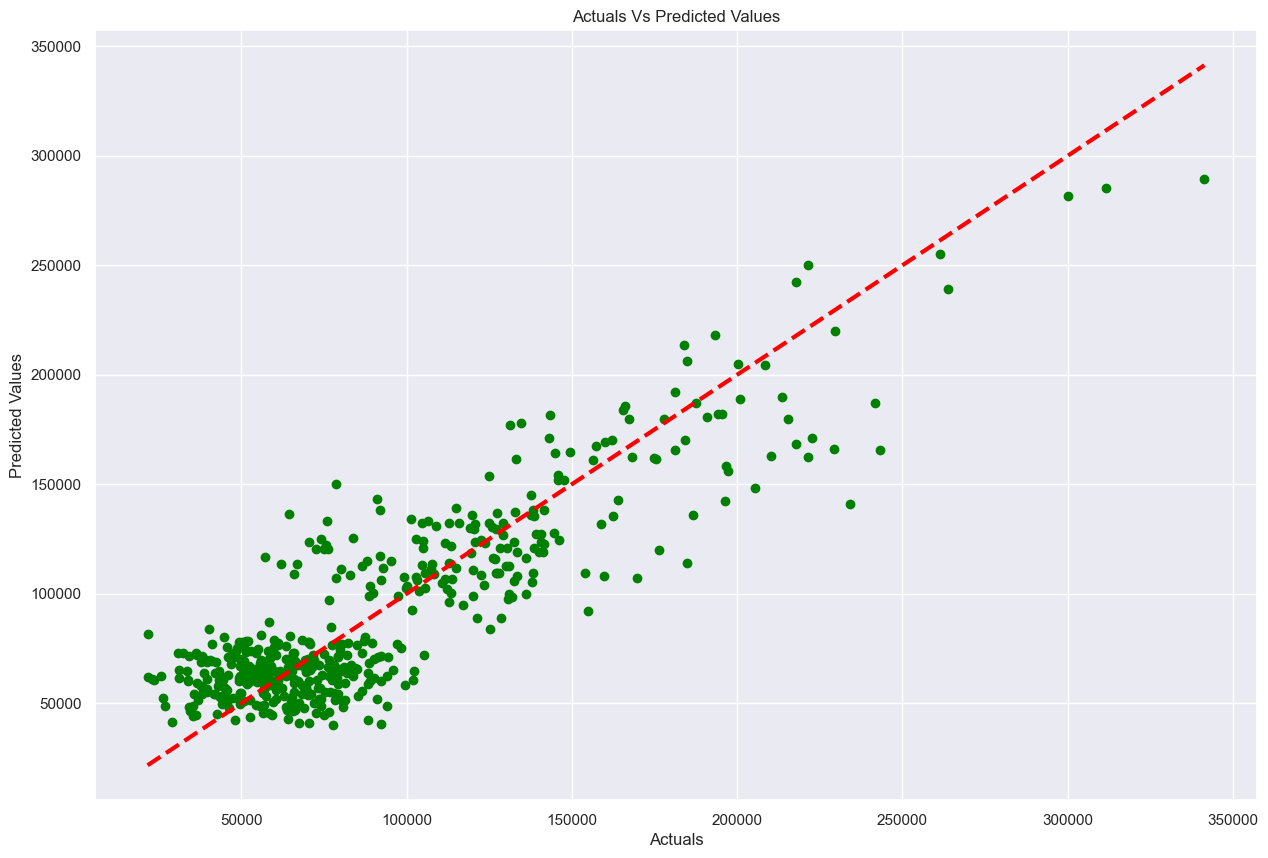

In [61]:
# Plotting Actuals Vs Predicted

plt.figure(figsize=(15,10))

plt.scatter(y_train, y_pred, c='green')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)
plt.xlabel('Actuals')
plt.ylabel('Predicted Values')
plt.title('Actuals Vs Predicted Values')
# increase size

C:\Users\sreen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actuals Vs Residuals')

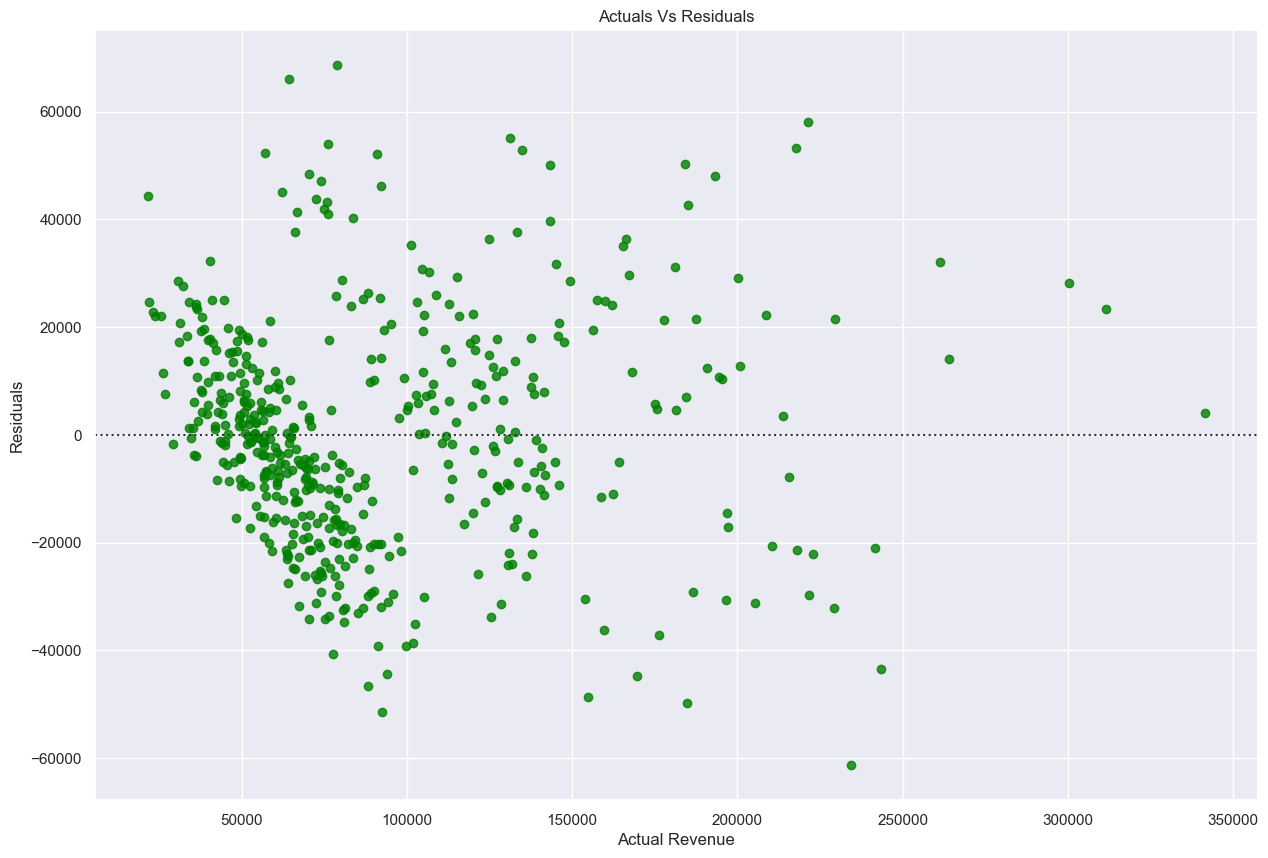

In [62]:
# Ploting Residuals

plt.figure(figsize=(15,10))

sns.residplot(y_train, y_pred, color='green')
plt.xlabel('Actual Revenue')
plt.ylabel('Residuals')
plt.title('Actuals Vs Residuals')

## How to use our L. Regression model to Make Predictions

In [63]:
# Passing Coeff into a table

Coeff = lm.coef_
Coeff.shape

# Reshaping
Coeff = Coeff.reshape(-1,2)


# Creating a Dataframe
Coeff_df = pd.DataFrame(Coeff, columns = [X2.columns])

# Displaying 
Coeff_df


,Items_Available,Daily_Customer_Count
0,24.432718,16.6477


In [73]:
# Making Predictions                        

# Variables


Items_Available = 932
Daily_Customer_Count = 1390

# Regression Formula for pred
# y = a + bx + ..   # Where y = Sales, a = intercept,  b = no. of Visitors and x = coefficient of engine size

# Prediction Calculator
pred1 = (lm.intercept_) +(Coeff_df['Items_Available'].values[0] * Items_Available) + (Coeff_df['Daily_Customer_Count'].values[0] * Daily_Customer_Count)

print('The predicted Sales is: ', pred1)

The predicted Sales is:  [49980.838156]
